In [1]:
# Some neccessary Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
Bank_note = pd.read_csv('BankNote.csv')
Bank_note.head() 

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
Bank_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
Bank_note.describe() # Statistical summary of the iris dataset

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
Bank_note.isnull().sum()/len(Bank_note)*100

variance    0.0
skewness    0.0
curtosis    0.0
entropy     0.0
class       0.0
dtype: float64

Text(0.5, 1.0, 'Distribution of Class')

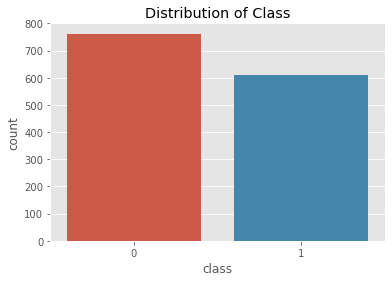

In [7]:
plt.style.use('ggplot')
sns.countplot(data = Bank_note , x = 'class')
plt.title('Distribution of Class')

In [8]:
X = Bank_note.iloc[: , :4]
y = Bank_note.iloc[: , -1]

In [10]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=4)

n_features = X.shape[1]
n_classes = 2

In [14]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=2)

In [15]:
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=2)

In [16]:

initializer0 = keras.initializers.RandomUniform(minval = -0.003, maxval =0.0)
initializer1 = keras.initializers.RandomUniform(minval = -0.003, maxval =0.0)

class Adaact(keras.layers.Layer):
    def __init__(self):
        super(Adaact, self).__init__()
        self.k0 = self.add_weight(name='k0', shape = (), initializer=initializer0, trainable=True)
        self.k1 = self.add_weight(name='k1', shape = (), initializer=initializer1, trainable=True)
        
    def call(self, inputs):
        return self.k0 + tf.multiply(inputs, self.k1)

In [17]:
np.random.seed(1)

In [18]:
model = Sequential()
model.add(layers.Dense(25, input_dim=n_features))
act = Adaact()
model.add(act)
model.add(layers.Dropout(0.1))
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                125       
                                                                 
 adaact (Adaact)             (None, 25)                2         
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 52        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [19]:
import datetime
batch_size = 5
epochs = 100

model.compile(loss="binary_crossentropy", optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.6320 - accuracy: 0.8210 - val_loss: 0.4990 - val_accuracy: 0.8227
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8860 - val_loss: 0.2409 - val_accuracy: 0.9182
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9441 - val_loss: 0.1268 - val_accuracy: 0.9591
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9647 - val_loss: 0.0767 - val_accuracy: 0.9818
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9726 - val_loss: 0.0561 - val_accuracy: 0.9818
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 0.0471 - val_accuracy: 0.9818
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9795 - val_loss: 0.0405 - val_accuracy: 0.9818

In [20]:
parameter_updates = history.history['loss']
print(parameter_updates)

[0.6320343613624573, 0.33984026312828064, 0.17653252184391022, 0.10368112474679947, 0.07049085199832916, 0.055935122072696686, 0.05060337111353874, 0.04270710051059723, 0.04256216064095497, 0.03905809298157692, 0.037381064146757126, 0.03422180935740471, 0.034683067351579666, 0.0317249521613121, 0.03502194210886955, 0.031653113663196564, 0.029360629618167877, 0.030980389565229416, 0.030546709895133972, 0.030116919428110123, 0.030044859275221825, 0.03194350376725197, 0.03109022229909897, 0.02740456722676754, 0.029949085786938667, 0.029671434313058853, 0.026157934218645096, 0.025436025112867355, 0.026861220598220825, 0.023171283304691315, 0.027152065187692642, 0.027621952816843987, 0.02549796923995018, 0.025175604969263077, 0.026571160182356834, 0.030742932111024857, 0.029272781684994698, 0.02800995483994484, 0.025942351669073105, 0.026816507801413536, 0.02777993492782116, 0.025007445365190506, 0.026796942576766014, 0.025413798168301582, 0.026653772220015526, 0.029215823858976364, 0.02749

In [21]:
final_parameter_values = model.get_weights()
print(final_parameter_values)

[array([[ 0.6228946 , -0.49300805,  0.3353868 ,  0.42964172,  0.8746694 ,
         0.7754015 , -0.89175504,  0.61443204,  0.1074964 ,  0.7385975 ,
        -0.35081485, -0.49741295, -0.48935202,  0.36399943,  0.5481587 ,
        -0.6076441 , -0.5231    , -0.7127808 ,  0.70818955,  0.71731645,
        -0.57066035,  0.52210397,  0.7494345 , -0.5450485 , -0.2032962 ],
       [ 0.26675358, -0.40478826,  0.27140546,  0.28531262,  0.591145  ,
         0.8167686 , -0.33717105,  0.5776198 ,  0.7861109 ,  0.16436419,
        -0.90563905, -0.41653952, -0.4937494 ,  0.5010739 ,  0.7575328 ,
        -0.43515605, -0.71516865, -0.6205915 ,  0.86119336,  0.77583325,
        -0.5413979 ,  0.8616843 ,  0.37085038, -0.23081371, -0.80200624],
       [ 0.26445305, -0.46545887,  0.04549919,  0.18284705,  0.6856161 ,
         0.64743376, -0.6679703 ,  0.4034492 ,  0.44843024,  0.18082951,
        -0.7004828 , -0.29888687, -0.7416453 ,  0.254237  ,  0.679604  ,
        -0.46266112, -0.58364856, -0.61823255,  

In [22]:
total_parameters = model.count_params()
print(total_parameters)

179


In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.015710528939962387
Test accuracy: 0.996363639831543


In [24]:
print("AF coefficients (weights) {}".format(act.get_weights()))

AF coefficients (weights) [-0.082201116, -1.3915402]


In [25]:
from sklearn.metrics import f1_score
# training and test loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
print(train_loss[-1])

0.0223818589001894


In [27]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [28]:
print(train_accuracy[-1])

0.9908779859542847


In [29]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 0s 2ms/step


In [30]:
f1 = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("F1-Score:", f1)

Test loss: 0.015710528939962387
Test accuracy: 0.996363639831543
F1-Score: 0.9963656013017715


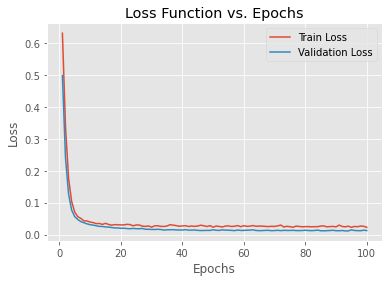

In [32]:
# Plot of loss function vs. epochs
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.legend()
plt.show()